In [114]:
!pip install nltk scikit-learn numpy pandas -q

In [115]:
# nltk: Natural Language Toolkit, commonly used for tasks like text processing, tokenization, and working with linguistic data.
# nltk: provides tools for working with human language data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidVectorizer is used to convert a collection of raw documents into a matrix of TF-IDF features.
from sklearn.metrics.pairwise import cosine_similarity
# cosinesimilarty s used to calculate the cosine similarity between samples in a dataset.
from wordcloud import WordCloud
import re
# re - regular expression module, used for pattern matching and text manipulation.
import nltk
from nltk.corpus import stopwords
# stopwords contains a list of common words (like "the", "a", "is") that are often removed during text preprocessing.
from nltk.tokenize import word_tokenize
# word_tokenize function from NLTK, used for splitting text into individual words or tokens.

In [116]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("movies.csv")

In [117]:
df.shape

(4803, 24)

In [118]:
# getting first 2 rows
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [119]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [120]:
# filter and get the required columns for recommendation
required_columns = ["genres", "keywords", "overview", "title"]

df = df[required_columns]


In [121]:
df.shape

(4803, 4)

In [122]:

df.head()

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter


In [123]:

# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [124]:
# Dropping off rows that contain missing values (Nan) in any of the columns to ensure purity of dataset (Data preprocessing)
df = df.dropna().reset_index(drop=True)

In [125]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4387 non-null   object
 1   keywords  4387 non-null   object
 2   overview  4387 non-null   object
 3   title     4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


In [126]:
# df['combines'] creates combined column and concatenates strings from 'genres', 'keywords', and 'overview' columns
# for discovering patterns in a more optimal way and will be used later for text analysis or feature extraction.
df['combined'] = df['genres'] + ' ' + df['keywords'] + ' ' + df['overview']

In [127]:
df.head()

,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Action Adventure Science Fiction based on nove...


In [128]:
df.tail()

,genres,keywords,overview,title,combined
4382,Drama,gang audition police fake homeless actress,A young woman in L.A. is having a bad day: she...,Bang,Drama gang audition police fake homeless actre...
4383,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,Friends/fledgling entrepreneurs invent a devic...,Primer,Science Fiction Drama Thriller distrust garage...
4384,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,El Mariachi just wants to play his guitar and ...,El Mariachi,Action Crime Thriller united states\u2013mexic...
4385,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered",Comedy Drama Romance TV Movie date love at fir...
4386,Documentary,obsession camcorder crush dream girl,Ever since the second grade when he first saw ...,My Date with Drew,Documentary obsession camcorder crush dream gi...


In [129]:
# creating a dataframe where we have only title and combined column
data = df[['title', 'combined']]

In [130]:
data.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...


In [131]:
data.shape

(4387, 2)

In [132]:
# WordCloud for movie content
# generating a word cloud visualization from the combined text data of the movies.
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

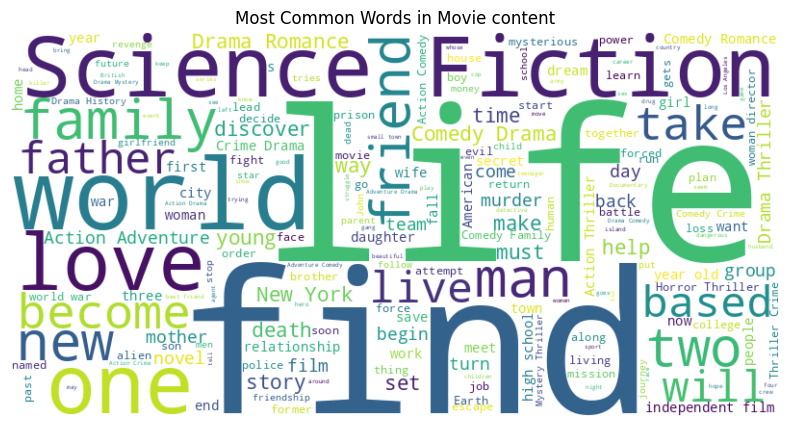

In [133]:

# WordCloud to visualize the most common words in the movie content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
# 'bilinear' is an optional parameter that affects how the image is displayed, often resulting in a smoother appearance.
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [134]:
# download nltk packages to set up the NLTK environment for text analysis.
nltk.download('punkt')
# 'punkt' tokenizer model are used to divide text into a list of sentences and words.
nltk.download('punkt_tab')
# Downloads additional tokenizer models.
nltk.download('stopwords')
# Downloads the list of common English stopwords (words like 'the', 'a', 'is', etc.) that are often removed during
# text preprocessing because they don't contribute much to the meaning of the text.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
#  uses the stopwords module from the NLTK library to get a list of common English stop words.
# words that are filtered out during text processing because they common & don't carry significant meaning ("the", "a", "is")
stop_words = set(stopwords.words('english'))


In [136]:
def preprocess_text(text):
    # Remove special characters and numbers through the re module (regular expression)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    # uses the word_tokenize function from NLTK to split the cleaned text into a list of individual words or tokens.
    tokens = word_tokenize(text)
    # This line filters the list of tokens, keeping only those words that are not present in the stop_words
    tokens = [word for word in tokens if word not in stop_words]
    # Finally, the function joins the processed tokens back into a single string, with each word separated by a space
    return " ".join(tokens)

In [137]:
# Apply preprocessing function stated above to the movie content
data['cleaned_text'] = df['combined'].apply(preprocess_text)

/tmp/ipython-input-2465486705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [138]:
# Get updated data with cleaned_text
data.head()

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based novel secret ...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,action crime drama thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...,action adventure science fiction based novel m...


In [139]:
# This code block performs vectorization of the cleaned text data using the TF-IDF technique
# creates an instance of the TfidfVectorizer
# max_features=5000 is a parameter that limits the vectorizer to consider only the top 5000 words based on their term frequency across the entire dataset.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# This line fits the vectorizer to the 'cleaned_text' data and transforms the text into a TF-IDF matrix.
# .fit_transform() first learns the vocabulary and inverse document frequencies from the data['cleaned_text']
# (the "fit" part) and then transforms the text data into a sparse matrix where each row represents a movie and each column represents a word from the vocabulary,
# tfidf_matrix is a numerical representation of the movie content, where the values reflect the importance of each word in a movie relative to the entire dataset.
# This matrix is commonly used for tasks like similarity calculations.
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [140]:
# Compute Cosine Similarity function from sklearn.metrics.pairwise to calculate the cosine similarity matrix
# It takes the tfidf_matrix as both inputs, meaning it will calculate the similarity of each row (movie) with every other row (movie), including itself.
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [141]:

print(cosine_sim[1])

[0.02901396 1.         0.03100093 ... 0.01749756 0.02801405 0.        ]


In [142]:
# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # Find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    # If the movie is found, this line gets the first index of the movie
    idx = idx[0]

    # Get similarity scores
    # retrieves the similarity scores between the input movie (at index idx) and all other movies from the cosine_sim matrix.

    sim_scores = list(enumerate(cosine_sim[idx]))

    # This line sorts the sim_scores list in descending order based on the similarity scores
    # (the second element of each pair, accessed using a lambda function).

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # selects the top top_n similarity scores, excluding the first one (which is the similarity of the movie with itself, always 1).
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    # this line extracts the original indices of the top top_n similar movies from the sorted sim_scores.
    movie_indices = [i[0] for i in sim_scores]

    # Returns  a DataFrame containing the titles of the top top_n similar movies based on the extracted movie_indices.
    return df[['title']].iloc[movie_indices]


In [143]:

data["title"]

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4382,Bang
4383,Primer
4384,El Mariachi
4385,"Signed, Sealed, Delivered"


In [147]:
# This line filters the df DataFrame to find rows where the value is located
row_index = df[df['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([9], dtype='int64')


In [148]:
 # to make sure the code above is working in linking index of movie in table to movie title
movie_name = data["title"][9]
print(movie_name)

Batman v Superman: Dawn of Justice


In [146]:
# Example Recommendation
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie Batman v Superman: Dawn of Justice
                title
14       Man of Steel
861       Superman II
424    Batman Returns
1401  Superhero Movie
3590         Defendor
